Exploratory Data Analysis (EDA)
- Gain Insight from Raw data
- Detect Errors, outliers, inconsistencies in values.
- Understand Feature Distribution, Skewness, and Correlations.
- Test Initail assumption about the data and it's structures.

- Distribution plots (KDE plots, Violin plots)
- Detect Outliers and Spread (Box plots, Violin plots, Strip plots)
- Categorical Comparison (Bar charts, Count plot, Pie Chart)
- Use Multivariate and Bivariate relationships to understand data trends.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load  Datasets
df = pd.read_csv("Datasets/laptop_price.csv", encoding="latin1")

In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
# Display Data types of datasets and memory allocation.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [5]:
# Get summary of all columns data.
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [6]:
# Capture Empty columns.
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [7]:
# Display columns
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [8]:
# check for uniwue values.
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

In [9]:
# Standardize columns names for consistency.
# Standardise column names to lowercase and add underscores.
df.columns = df.columns.str.lower().str.replace("-", "")
df.columns

Index(['laptop_id', 'company', 'product', 'typename', 'inches',
       'screenresolution', 'cpu', 'ram', 'memory', 'gpu', 'opsys', 'weight',
       'price_euros'],
      dtype='object')

In [10]:
# Correct column abbreviated column names.
df.rename(columns={"cpu": "device_processor (CPU)", "ram": "device_memory (RAM)", "opsys" : "operating_system", "typename": "laptop_type", "memory": "memory_capacity"}, inplace=True)
df.columns

Index(['laptop_id', 'company', 'product', 'laptop_type', 'inches',
       'screenresolution', 'device_processor (CPU)', 'device_memory (RAM)',
       'memory_capacity', 'gpu', 'operating_system', 'weight', 'price_euros'],
      dtype='object')

In [11]:
# Correct screen resolution column name.
df.rename(columns={"screenresolution": "screen_resolution", "company" : "manufacturers_info"}, inplace=True)
df.columns

Index(['laptop_id', 'manufacturers_info', 'product', 'laptop_type', 'inches',
       'screen_resolution', 'device_processor (CPU)', 'device_memory (RAM)',
       'memory_capacity', 'gpu', 'operating_system', 'weight', 'price_euros'],
      dtype='object')

In [12]:
# Check for duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1298    False
1299    False
1300    False
1301    False
1302    False
Length: 1303, dtype: bool

In [13]:
# Fill all inconsistencies in operating system.
# Get unique valid operating systems (excluding "No OS")
valid_os = df.loc[df["operating_system"] != "No OS", "operating_system"].unique()

# Replace No operating system with random operating system.
df.loc[df["operating_system"] == "No OS", "operating_system"] = np.random.choice(valid_os, size=(df["operating_system"] == "No OS").sum())
df

,laptop_id,manufacturers_info,product,laptop_type,inches,screen_resolution,device_processor (CPU),device_memory (RAM),memory_capacity,gpu,operating_system,weight,price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Android,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [15]:
# Replace inconsistent operating system names.
df["operating_system"] = df["operating_system"].replace({"Mac OS X": "MacOS"})
df

,laptop_id,manufacturers_info,product,laptop_type,inches,screen_resolution,device_processor (CPU),device_memory (RAM),memory_capacity,gpu,operating_system,weight,price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Android,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [ ]:
# Flag all incosistencies in memory capacity


In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price_euros'], bins=50, kde=True)
plt.title("Laptop Price Distribution")
plt.show()

sns.boxplot(x=df['Price_euros'])
plt.title("Laptop Price Spread")
plt.show()

KeyError: 'Price_euros'

<Figure size 800x500 with 0 Axes>

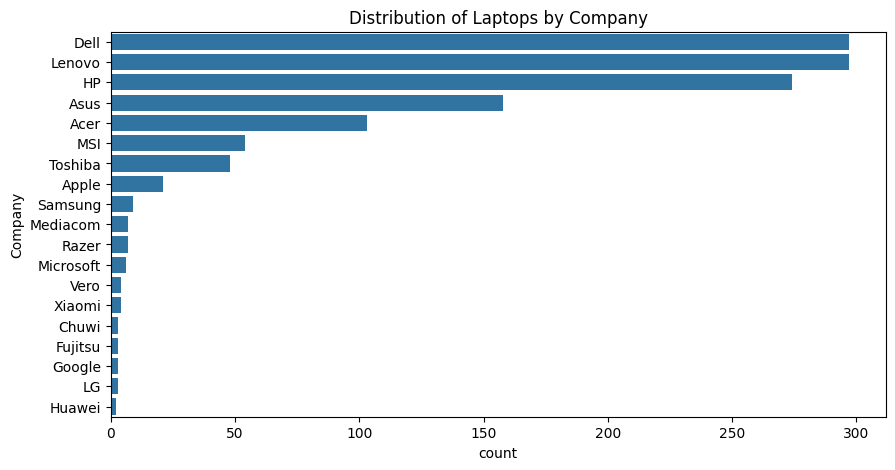

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y=df['Company'], order=df['Company'].value_counts().index)
plt.title("Distribution of Laptops by Company")
plt.show()

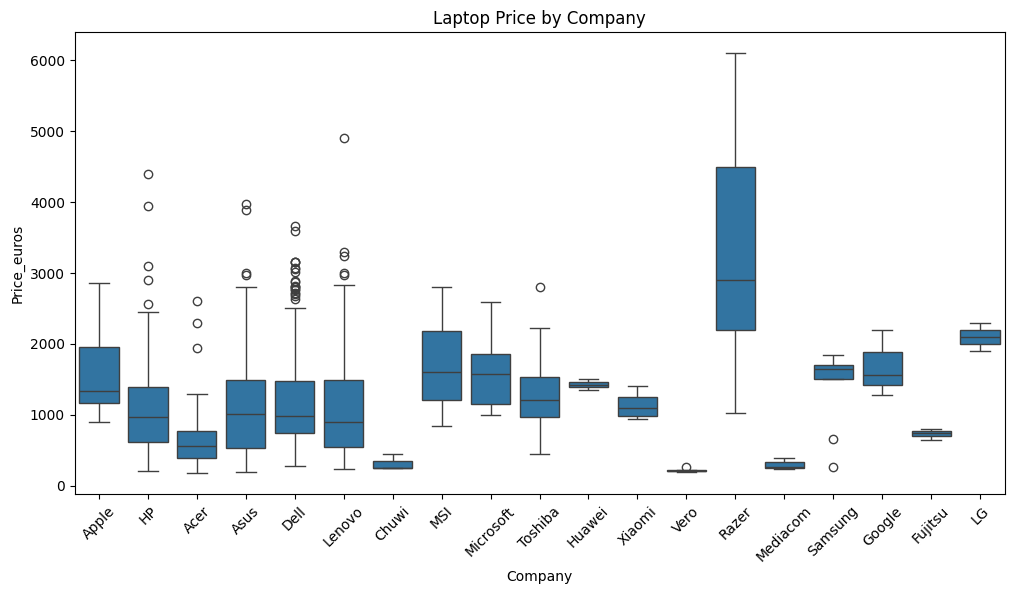

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Company', y='Price_euros', data=df)
plt.xticks(rotation=45)
plt.title("Laptop Price by Company")
plt.show()

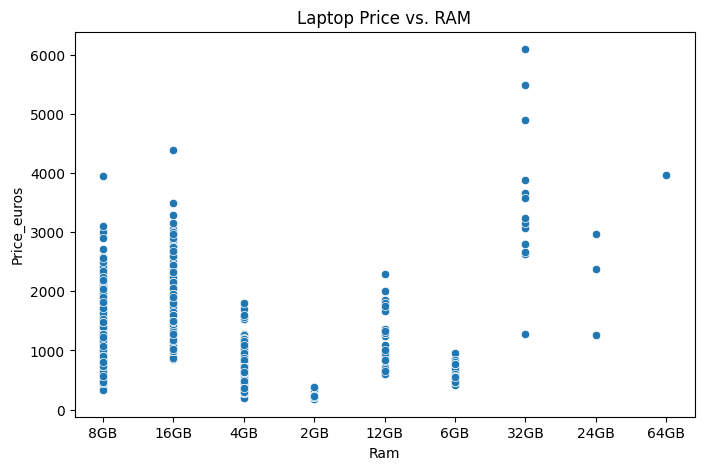

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Ram', y='Price_euros', data=df)
plt.title("Laptop Price vs. RAM")
plt.show()

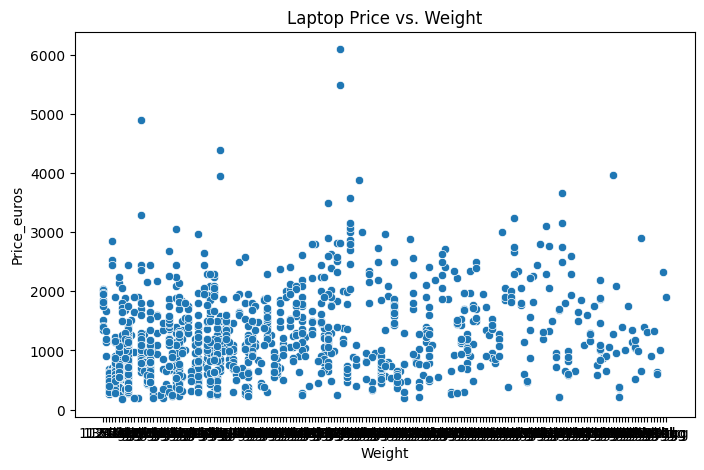

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Weight', y='Price_euros', data=df)
plt.title("Laptop Price vs. Weight")
plt.show()

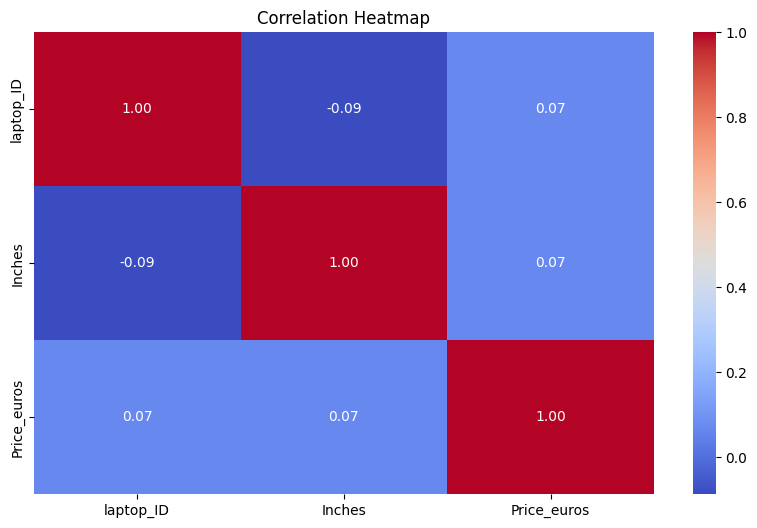

Price_euros    1.000000
Inches         0.068197
laptop_ID      0.067830
Name: Price_euros, dtype: float64

In [ ]:
# Focus on numerical features only
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

corr['Price_euros'].sort_values(ascending=False)

### Most Influential Factors Affecting Laptop pricesnBased on my Analysis

Based on the exploratory data analysis:

- **RAM**: Strong positive relationship with laptop prices. Laptops with higher RAM tend to be more expensive.  
- **Processor Type / CPU Generation**: Newer and faster processors significantly increase laptop price.  
- **GPU**: Laptops with dedicated GPUs (e.g., NVIDIA, AMD) cost more than those with integrated graphics.  
- **Company / Brand**: Premium brands such as Apple and Dell XPS models are generally more expensive.  
- **Storage Type**: SSD-based laptops are priced higher compared to HDD-only laptops.  
- **Weight**: Lightweight ultrabooks often have higher prices due to their premium build quality.

###  Conclusion
From the analysis, **RAM, processor type, and GPU presence** appear to be the most influential features affecting laptop prices.  
